In [146]:
# reload magics
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [148]:
# load the data from the xlsx file
df = pd.read_excel('../lc-project-data/DATASET.xlsx')


In [171]:
# countries from the data dictionary

fn = "/Users/david/projects/lc-project-data/LCOPTIMIZE_DataDictionary_with codes-2024-04-08.xlsx"

countries = pd.read_excel(fn, sheet_name = "Countries")

# reset the index to be the country code
countries = countries.set_index("country_code")

countries

,country
country_code,
1,Algeria
2,Armenia
3,Australia
4,Austria
5,Bangladesh
...,...
95,Venezuela
96,Vietnam
97,Yugoslavia


## FEATURE SETS

In [149]:

df_columns = df.columns

## DEMO + HX

In [150]:
RECORDS = ["record_id"]


# demographics etc
DEMOGRAPHICS = ["sex", "age", "home_location", "living_with", "number_of_persons_in_house"]

GEOGRAPHY = ["country"]
EMPLOYMENT = ["employed", "occupation", "hcp", "micro"]

# substances
SUBSTANCES = [col for col in df_columns if "substances___" in col]

# find all columns with hhx in the name
HEALTH    = ["global"]
HEALTH_HX = [col for col in df_columns if "hhx" in col]

# medications
MEDICATIONS = [col for col in df_columns if "medication" in col]

# PHX completeness
PHX_COMPLETE = ["phx_complete"]

# GAD
GAD = [col for col in df_columns if "_gad" in col]

# PROMIS
PROMIS = [col for col in df_columns if "promis29" in col]
PROMIS_COMPLETE = [col for col in df_columns if "promis_29_profile" in col]

# PHQ
PHQ = [col for col in df_columns if "phq" in col]
PHQ_COMPLETE = [col for col in df_columns if "patient_health_questionaire" in col]




In [151]:
# add up the health history information
HX = HEALTH_HX + MEDICATIONS + GAD + PROMIS + PHQ

# for each column in HX, check if there are values that are just spaces
for col in HX:
    # are any of the values just spaces?
    if df[col].apply(lambda x: isinstance(x, str) and x.isspace()).any():
        print(f"Column {col} has spaces")

        # remove the spaces and replace with blank
        # df[col] = df[col].apply(lambda x: np.nan if isinstance(x, str) else x)

# for each column in HX, check if there are values that are just spaces



<Axes: >

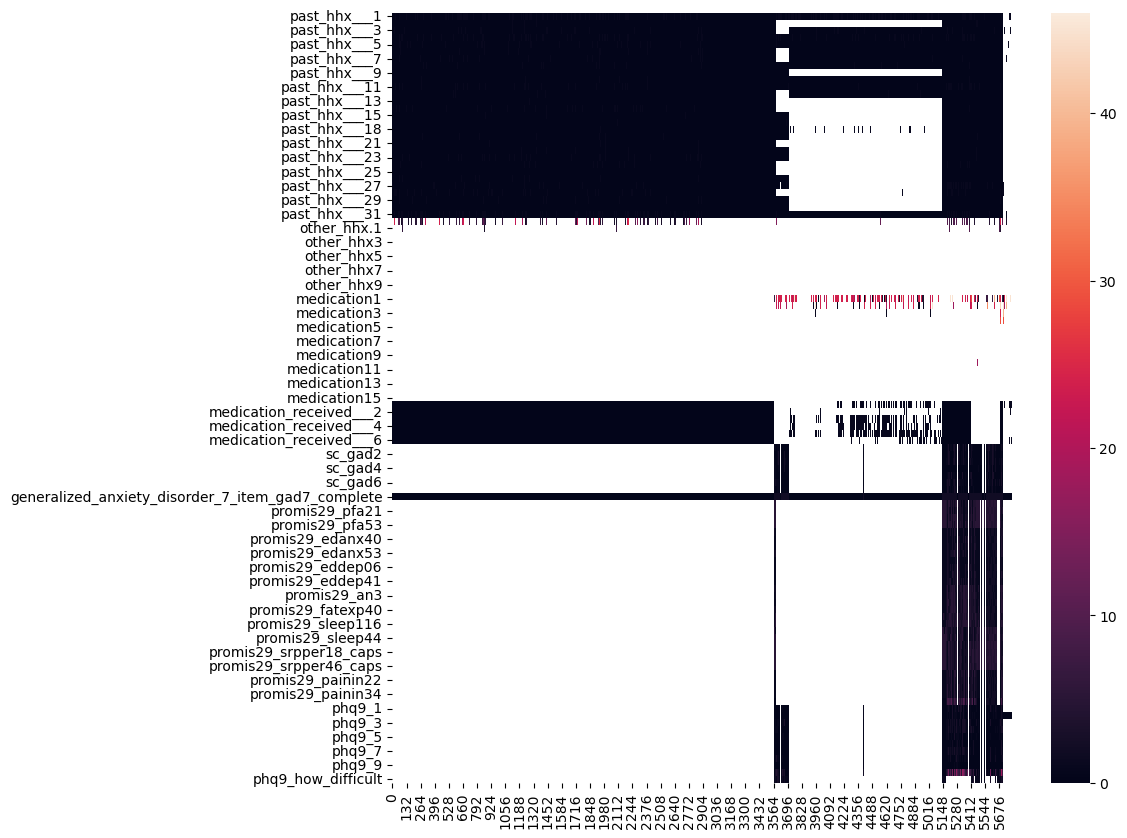

In [152]:


import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[HX].T, cbar=True, ax = ax)


In [153]:
# count countries
df["country"].value_counts()

country
16.0    2407
10.0     670
94.0      56
98.0      45
57.0      43
        ... 
2.0        1
65.0       1
17.0       1
76.0       1
38.0       1
Name: count, Length: 99, dtype: int64

In [174]:
# group by country and count the number of nulls per country
nulls_per_country = df.groupby("country").apply(lambda x: x.isnull().sum()).T.sum()

# look up the country code as the index


nulls_per_country = nulls_per_country.to_frame("nulls").join(countries)
nulls_per_country

,nulls,country
country,,
1.0,4484,Algeria
2.0,172,Armenia
3.0,445,Australia
4.0,195,Austria
5.0,1030,Bangladesh
...,...,...
95.0,999,Venezuela
96.0,907,Vietnam
97.0,193,Yugoslavia


## CLINICAL TESTS


In [155]:

s = "igg	wbc	neutrophil	neutrophil_count	lymphocyte	lymphocyte_count	monocyte	monocyte_count	eosinophil	eosinophil_count	basophil	basophil_count	platelets	haemoglobin	urea	creatinine	ntprobnp	bnp	sodium	potassium	crp	ldh	cpk	albumin		ast	alt	pct	troponinthigh	troponinihigh	troponint	troponini	aptt	inr	triglycerides	bilirubin	bilirubin_direct	glucose	fibrinogen	ferritin	il6	cd4	cd8	angiography	pocus	echocardiogram	echoresult	ekg	ekgresult	ekgcode	stented	cxr	cxrresult	cxrcode	cta	ctaresult	ctt	cttresult	cth	cthresult	imaging_results	imaging	spirometry	spirometryresult	metacholine	lung_function	lung_functionresult"
words = s.split()
words.sort()
CLINICAL_TESTS = words

# remove imaging_results from the list
CLINICAL_TESTS.remove("imaging_results")


CLIN_TESTS_COMPLETE = [col for col in df_columns if "clinical_tests_complete" in col]

In [156]:
df[CLINICAL_TESTS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   albumin              1354 non-null   float64
 1   alt                  1718 non-null   float64
 2   angiography          7 non-null      float64
 3   aptt                 580 non-null    float64
 4   ast                  1055 non-null   float64
 5   basophil             568 non-null    float64
 6   basophil_count       840 non-null    float64
 7   bilirubin            1432 non-null   float64
 8   bilirubin_direct     703 non-null    float64
 9   bnp                  18 non-null     float64
 10  cd4                  2 non-null      float64
 11  cd8                  2 non-null      float64
 12  cpk                  151 non-null    float64
 13  creatinine           1469 non-null   float64
 14  crp                  1657 non-null   float64
 15  cta                  33 non-null     f

In [184]:
# remove columns that have less than 200 non-null points
TTT = [col for col in CLINICAL_TESTS if df[col].count() > 200]

ttt = df[TTT].copy()
ttt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   albumin           1354 non-null   float64
 1   alt               1718 non-null   float64
 2   aptt              580 non-null    float64
 3   ast               1055 non-null   float64
 4   basophil          568 non-null    float64
 5   basophil_count    840 non-null    float64
 6   bilirubin         1432 non-null   float64
 7   bilirubin_direct  703 non-null    float64
 8   creatinine        1469 non-null   float64
 9   crp               1657 non-null   float64
 10  ctt               254 non-null    float64
 11  cttresult         248 non-null    float64
 12  cxr               294 non-null    float64
 13  cxrresult         251 non-null    float64
 14  ekg               219 non-null    float64
 15  eosinophil        522 non-null    float64
 16  eosinophil_count  841 non-null    float64


In [187]:
ttt.describe()

,albumin,alt,aptt,ast,basophil,basophil_count,bilirubin,bilirubin_direct,creatinine,crp,...,pct,platelets,potassium,sodium,spirometry,triglycerides,troponinihigh,troponinthigh,urea,wbc
count,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,...,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000
mean,39.921408,30.958556,31.686819,24.789224,0.013162,0.014922,5.975522,0.270657,74.042077,13.143555,...,0.146609,246.357668,4.016319,137.918234,0.006038,97.737744,14.016905,14.594618,6.003631,7.132967
std,7.139453,22.727548,4.379030,15.565731,0.076665,0.121071,13.801686,2.023517,52.670119,38.805267,...,0.290773,57.763668,0.271036,1.797132,0.077474,46.659188,333.311864,10.998066,6.856954,2.393551
min,17.000000,5.000000,1.400000,1.600000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,...,0.020000,1.000000,2.200000,115.000000,0.000000,0.700000,2.000000,1.000000,0.300000,1.000000
25%,40.000000,28.000000,31.550000,23.000000,0.000000,0.000000,4.000000,0.100000,71.000000,3.320000,...,0.130000,243.000000,4.000000,138.000000,0.000000,95.000000,8.000000,14.000000,4.800000,6.900000
50%,40.000000,28.000000,31.550000,23.000000,0.000000,0.000000,4.000000,0.100000,71.000000,3.320000,...,0.130000,243.000000,4.000000,138.000000,0.000000,95.000000,8.000000,14.000000,4.800000,6.900000
75%,40.000000,28.000000,31.550000,23.000000,0.000000,0.000000,4.000000,0.100000,71.000000,3.320000,...,0.130000,243.000000,4.000000,138.000000,0.000000,95.000000,8.000000,14.000000,4.800000,6.900000
max,404.000000,921.000000,240.000000,478.600000,1.400000,2.000000,680.700000,53.000000,1762.000000,637.400000,...,11.750000,1480.000000,13.300000,160.000000,1.000000,1589.000000,25000.000000,661.000000,162.000000,81.700000


<Axes: >

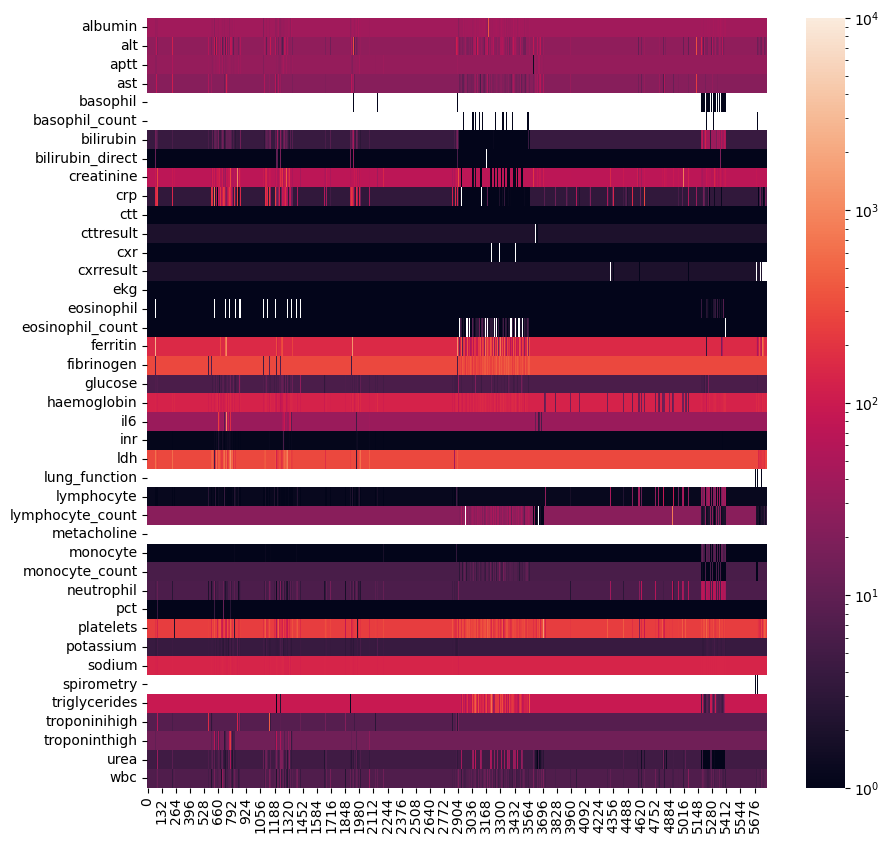

In [188]:
# replace the nans with median values
for col in TTT:
    ttt[col] = ttt[col].fillna(ttt[col].median())

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))

norm = mc.LogNorm(vmin=1, vmax=10_000)


sns.heatmap(ttt.T, cbar=True, ax = ax, norm = norm)


<Axes: >

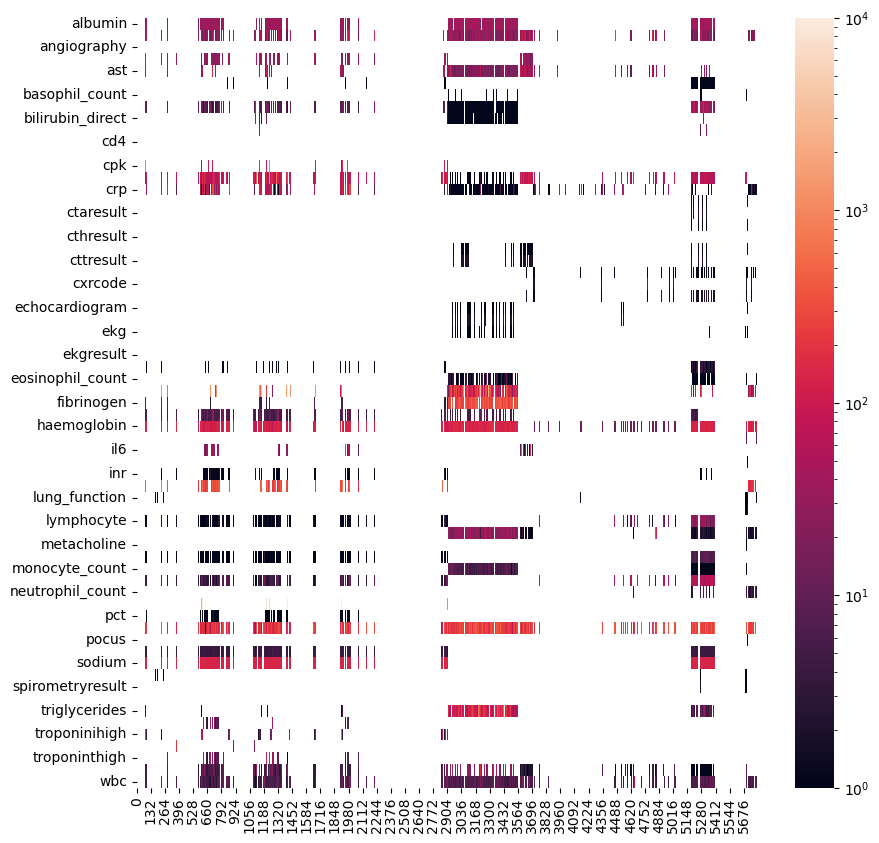

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# use matplotlib lognorm for colour scale

import matplotlib.colors as mc

norm = mc.LogNorm(vmin=1, vmax=10_000)


sns.heatmap(df[CLINICAL_TESTS].T, cbar=True, ax = ax, norm = norm)

## VACCINES

In [112]:
VAX_STATUS = ["vaccinated"]


# given a list of substrings, find aall columns that contain the substrings
def find_columns(df_columns, substrings):
    return [col for col in df_columns if any(substring in col for substring in substrings)]

VAX = find_columns(df_columns, ["astra_zeneca", "pfizer", "moderna", "j_j", "sinoppharm", "sinovac", "sputnik", "other___"])

VAX_SIDE_EFFECTS = find_columns(df_columns, ["vac_sideeffect"])

<Axes: >

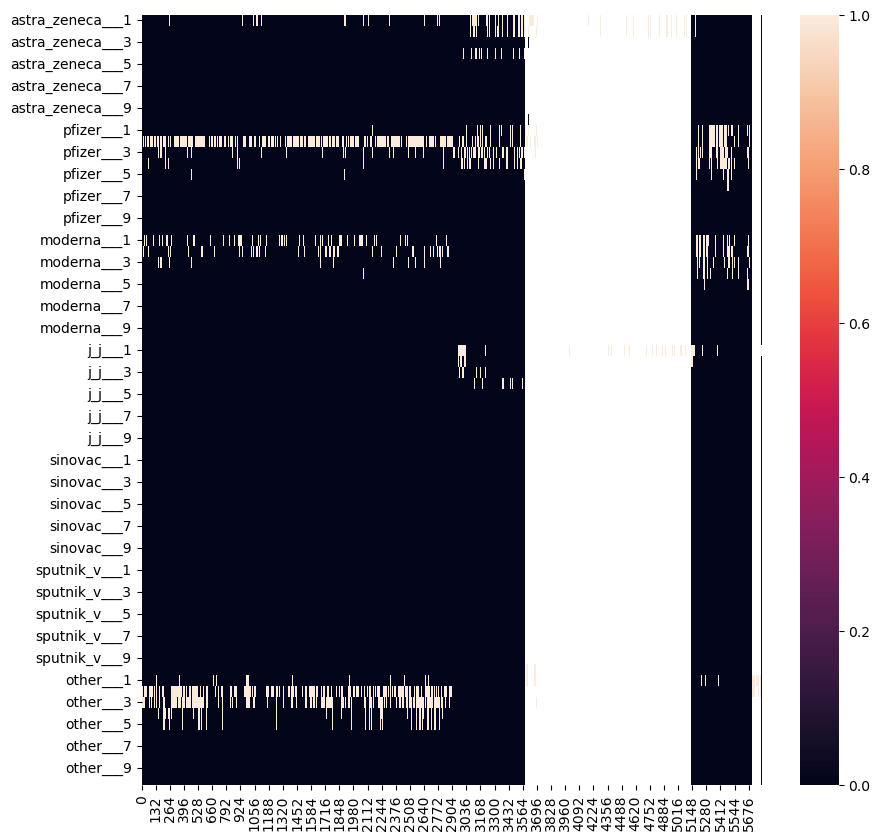

In [114]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df[VAX].T, cbar=True, ax = ax)

## VIZ

## PARTICIPANT TYPES

In [58]:
df['participant_type'].value_counts()

participant_type
7     1778
6     1607
10    1147
13     493
5      327
4      242
8       84
11      43
3       38
2       31
1        7
Name: count, dtype: int64

In [59]:
# LC_positive types
pos_vals =  [2,4,6,8,9,12,13]
neg_vals = [1,5,7,10,]
hc_vals = [3,11, 14,15]


In [60]:
LC_pos = df.query('participant_type in @pos_vals')
LC_neg = df.query('participant_type in @neg_vals')
HC = df.query('participant_type in @hc_vals')

In [61]:
df['LC_STATUS'] = df['participant_type'].apply(lambda x: 'LC_POS' if x in pos_vals else 'LC_NEG' if x in neg_vals else 'HC')

<Axes: xlabel='LC_STATUS', ylabel='age'>

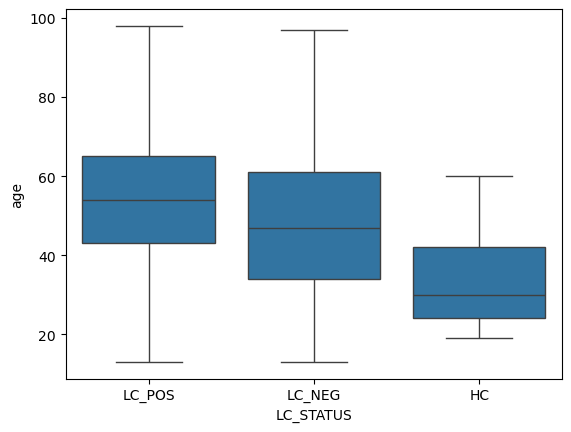

In [62]:
sns.boxplot(data=df, x='LC_STATUS', y='age')


In [175]:
LC_pos[CLINICAL_TESTS].shape

(2457, 65)

In [194]:
# clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from hdbscan import HDBSCAN
from umap import UMAP

hdb_ = HDBSCAN(min_cluster_size=50, min_samples=5)

umap_ = UMAP(n_components=2)

scaler = StandardScaler().set_output(transform = "pandas")



In [195]:
# drop all  columns of type object
df_num = df.select_dtypes(exclude=['object'])
df_num = df_num.select_dtypes(exclude=['datetime'])

df_num.shape

(5797, 667)

In [196]:
X = scaler.fit_transform(ttt.loc[LC_pos.index])
X.shape

(2457, 41)

In [197]:
# drop the NAs
X = X.dropna()
X.shape

(2457, 41)

<Axes: >

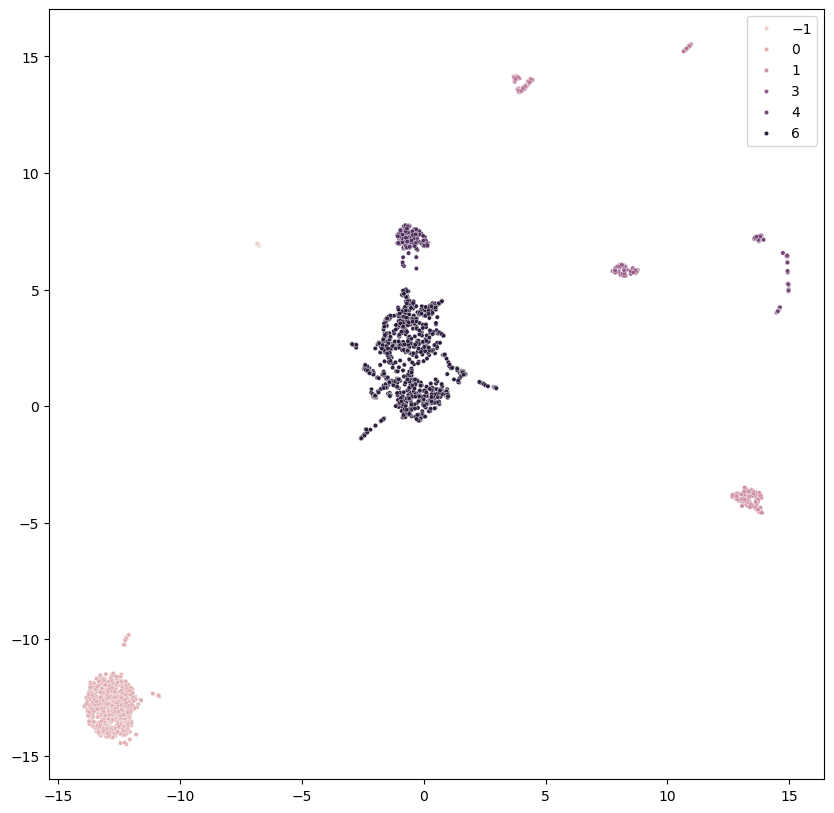

In [200]:
# umap

X_umap = umap_.fit_transform(X)
# sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=10)

# cluster
hdb_.fit(X_umap)

# plot the clusters

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=hdb_.labels_, s=10)

In [199]:
set(hdb_.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6}